In [1]:
### YOUR CODE HERE
### Use "lets be rational" implementation of implied volatility calculation from https://github.com/vollib/py_vollib

**Full name:** Gleb Gavrin

# №1

In [2]:
with open('market_call_data.txt') as file:
    lines = [line.rstrip() for line in file]

In [3]:
print(lines)

['# expiration, strike, call_price', '0.10000, 0.65000, 0.35002', '0.10000, 0.70000, 0.30009', '0.10000, 0.75000, 0.25031', '0.10000, 0.80000, 0.20100', '0.10000, 0.85000, 0.15296', '0.10000, 0.90000, 0.10787', '0.10000, 0.95000, 0.06853', '0.10000, 1.00000, 0.03805', '0.10000, 1.05000, 0.01804', '0.10000, 1.10000, 0.00727', '0.10000, 1.15000, 0.00253', '0.10000, 1.20000, 0.00079', '0.10000, 1.25000, 0.00023', '0.10000, 1.30000, 0.00006', '0.10000, 1.35000, 0.00002', '0.15000, 0.65000, 0.35022', '0.15000, 0.70000, 0.30054', '0.15000, 0.75000, 0.25131', '0.15000, 0.80000, 0.20302', '0.15000, 0.85000, 0.15663', '0.15000, 0.90000, 0.11372', '0.15000, 0.95000, 0.07639', '0.15000, 1.00000, 0.04672', '0.15000, 1.05000, 0.02577', '0.15000, 1.10000, 0.01284', '0.15000, 1.15000, 0.00586', '0.15000, 1.20000, 0.00252', '0.15000, 1.25000, 0.00104', '0.15000, 1.30000, 0.00043', '0.15000, 1.35000, 0.00017', '0.20000, 0.65000, 0.35072', '0.20000, 0.70000, 0.30147', '0.20000, 0.75000, 0.25293', '0.200

In [4]:
call_data = lines[1:]
print(call_data)

['0.10000, 0.65000, 0.35002', '0.10000, 0.70000, 0.30009', '0.10000, 0.75000, 0.25031', '0.10000, 0.80000, 0.20100', '0.10000, 0.85000, 0.15296', '0.10000, 0.90000, 0.10787', '0.10000, 0.95000, 0.06853', '0.10000, 1.00000, 0.03805', '0.10000, 1.05000, 0.01804', '0.10000, 1.10000, 0.00727', '0.10000, 1.15000, 0.00253', '0.10000, 1.20000, 0.00079', '0.10000, 1.25000, 0.00023', '0.10000, 1.30000, 0.00006', '0.10000, 1.35000, 0.00002', '0.15000, 0.65000, 0.35022', '0.15000, 0.70000, 0.30054', '0.15000, 0.75000, 0.25131', '0.15000, 0.80000, 0.20302', '0.15000, 0.85000, 0.15663', '0.15000, 0.90000, 0.11372', '0.15000, 0.95000, 0.07639', '0.15000, 1.00000, 0.04672', '0.15000, 1.05000, 0.02577', '0.15000, 1.10000, 0.01284', '0.15000, 1.15000, 0.00586', '0.15000, 1.20000, 0.00252', '0.15000, 1.25000, 0.00104', '0.15000, 1.30000, 0.00043', '0.15000, 1.35000, 0.00017', '0.20000, 0.65000, 0.35072', '0.20000, 0.70000, 0.30147', '0.20000, 0.75000, 0.25293', '0.20000, 0.80000, 0.20570', '0.20000, 0.8

In [5]:
print(len(call_data))

105


In [6]:
expir = [] #Время до экспирации
strike = [] #страйки
price = []  #цены

In [7]:
for opt in call_data:
    L1 = opt.split(', ')
    L11 = [float(x) for x in L1]
    
    


    expir.append(L11[0])
    strike.append(L11[1])
    price.append(L11[2])
print(expir)
print(strike)
print(price)
    

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
[0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 0.65, 0.7, 0.

In [8]:
tmin = min(expir)
tmax = max(expir)
smin = min(strike)
smax = max(strike)

print(tmin)
print(tmax)
print(smin)
print(smax)

0.1
0.4
0.65
1.35


In [9]:
#Что у нас есть: 
#s0 = 1.0    # spot price S_0
#r = 0.0    # zero interest rate
#expir - список с временем до экспирации каждого опциона
#strike - список со страйками каждого опциона
#price - список с ценами каждого опциона
#increment = 0.001

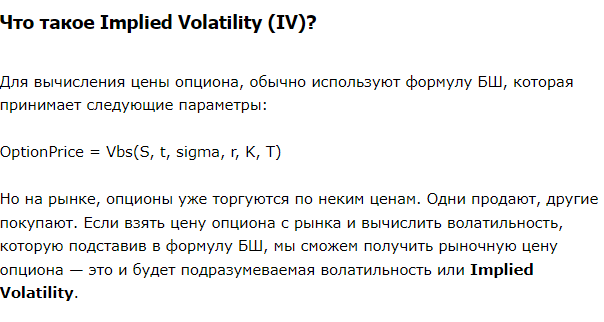

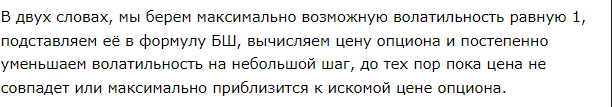

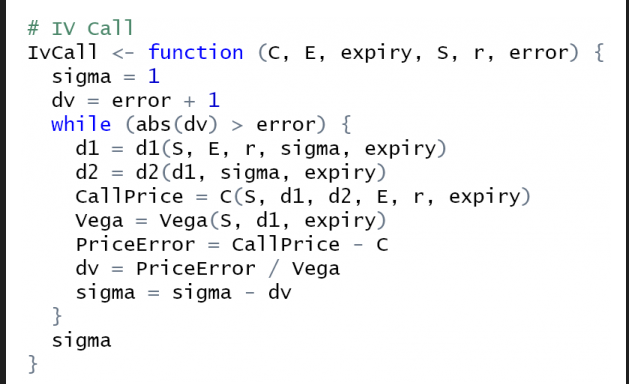

In [10]:
#Реализуем функцию для подсчёта d1:

In [11]:
#import math

In [12]:
#def d1(s, Strike, r, volatility, expiry1):
 #   fair_price1 = (log(s / Strike) + (r + 0.5 * volatility ^ 2) * (expiry)) / (volatility * sqrt(expiry))
  #  return fair_price1                                                                                  
                                                                                     

In [13]:
#def d2(s, Strike, r, volatility, expiry1):
 #   fair_price2 = (log(s / Strike) + (r - 0.5 * volatility ^ 2) * (expiry)) / (volatility * sqrt(expiry))
  #  return fair_price2
    

In [14]:
#scipy.stats.norm.cdf() это ф-я распр станд норм распр-я

In [15]:
#def Vega(fair_price1, expiry1, s):
 #   vega1 = s * sqrt(expiry1 / pi / 2) * exp(-0.5 * fair_price1 ^ 2)
  #  return vega1

In [16]:
#def Call_Black(fair_price1, fair_price2, expiry1, s, r, Strike):
 #   call_model = s * scipy.stats.norm.cdf(d1) - Strike * exp(-r * (expiry1)) * scipy.stats.norm.cdf(d2)
  #  return call_model

In [17]:
s0 = 1.0    # spot price S_0
r = 0.0
increment = 0.001 #приближение подразумеваемой волатильноси к реальной

In [18]:
def d1(s0, strike1, r, volatility, expiry):
    return (math.log(s0 / strike1) + (r + 0.5 * volatility ** 2) * expiry) / (volatility * math.sqrt(expiry))

def d2(d1, volatility, expiry):
    return d1 - volatility * math.sqrt(expiry)
#расчет цены опциона по Бл-Ш:
def Cb(s0, d1, d2, strike1, r, expiry):
    return s0 * norm.cdf(d1) - strike1 * math.exp(-r * expiry) * norm.cdf(d2)

def Vega(s0, d1, expiry):
    return s0 * math.sqrt(expiry / math.pi / 2) * math.exp(-0.5 * d1 ** 2)

def ImpVol(market_price, strike1, expiry, s0, r, increment):
    sigma = 1
    dv = increment + 1
    while abs(dv) > increment:
        d1_val = d1(s0, strike1, r, sigma, expiry)
        d2_val = d2(d1_val, sigma, expiry)
        CallPrice = Cb(s0, d1_val, d2_val, strike1, r, expiry)
        Vega_val = Vega(s0, d1_val, expiry)
        PriceError = CallPrice - market_price
        dv = PriceError / Vega_val
        sigma = sigma - dv
    return sigma


In [19]:
#создадим список списков, где в каждом подсписке параметры одного опциона:
import math
import numpy as np
import scipy
from scipy.stats import norm

In [20]:
all_opts = []
for i in range(len(expir)):
    optK = []
    optK.append(expir[i])
    optK.append(strike[i])
    optK.append(price[i])
    all_opts.append(optK)
print(all_opts)    

[[0.1, 0.65, 0.35002], [0.1, 0.7, 0.30009], [0.1, 0.75, 0.25031], [0.1, 0.8, 0.201], [0.1, 0.85, 0.15296], [0.1, 0.9, 0.10787], [0.1, 0.95, 0.06853], [0.1, 1.0, 0.03805], [0.1, 1.05, 0.01804], [0.1, 1.1, 0.00727], [0.1, 1.15, 0.00253], [0.1, 1.2, 0.00079], [0.1, 1.25, 0.00023], [0.1, 1.3, 6e-05], [0.1, 1.35, 2e-05], [0.15, 0.65, 0.35022], [0.15, 0.7, 0.30054], [0.15, 0.75, 0.25131], [0.15, 0.8, 0.20302], [0.15, 0.85, 0.15663], [0.15, 0.9, 0.11372], [0.15, 0.95, 0.07639], [0.15, 1.0, 0.04672], [0.15, 1.05, 0.02577], [0.15, 1.1, 0.01284], [0.15, 1.15, 0.00586], [0.15, 1.2, 0.00252], [0.15, 1.25, 0.00104], [0.15, 1.3, 0.00043], [0.15, 1.35, 0.00017], [0.2, 0.65, 0.35072], [0.2, 0.7, 0.30147], [0.2, 0.75, 0.25293], [0.2, 0.8, 0.2057], [0.2, 0.85, 0.16071], [0.2, 0.9, 0.11935], [0.2, 0.95, 0.08328], [0.2, 1.0, 0.05409], [0.2, 1.05, 0.03255], [0.2, 1.1, 0.01823], [0.2, 1.15, 0.00963], [0.2, 1.2, 0.00489], [0.2, 1.25, 0.00244], [0.2, 1.3, 0.00121], [0.2, 1.35, 0.00061], [0.25, 0.65, 0.35157],

In [21]:
#рассчитаем подразумеваемую волатильность для каждого опциона с помощью ранее созданной модели:

In [22]:
IV_opts = []
for OPT in all_opts:
    IV_OPT = ImpVol(market_price=OPT[2], strike1=OPT[1], expiry=OPT[0], s0=1.0, r=0.0, increment=0.001)
    IV_opts.append(IV_OPT)
print(IV_opts)    

[0.42559665717180384, 0.4069720191758915, 0.3834807262709031, 0.3623835644367295, 0.34356251390718423, 0.32690686116298756, 0.3129668187069307, 0.3017236185192169, 0.2933336271779421, 0.2879608923765194, 0.28528125095247653, 0.28514636642685753, 0.28688791098172395, 0.2879863097356105, 0.29637647080122603, 0.4334656402898824, 0.4073077306610192, 0.3845452783571381, 0.3633452564228214, 0.3443607297142837, 0.32785713594886157, 0.313843701352618, 0.30254887423708504, 0.294217187169934, 0.2888007383751213, 0.28604479687578055, 0.2858763091287261, 0.2873085478553427, 0.2907565973582375, 0.2935330187229434, 0.43395021717242016, 0.40858184026976235, 0.385299446591523, 0.364344126589025, 0.34537040405557956, 0.32880203735975283, 0.3146770582932752, 0.30340656642614255, 0.29501624538254617, 0.2895807921744784, 0.28689782532646757, 0.286577829766263, 0.2882700455000454, 0.2911966397811515, 0.29544250988426446, 0.43541007783105135, 0.4099154155232696, 0.3865682007206292, 0.36529962936529864, 0.34

In [23]:
print(len(IV_opts))

105


In [24]:
#волатильность для каждого опциона в %
IV_percent_opts = [iv*100 for iv in IV_opts]
print(IV_percent_opts)

[42.55966571718039, 40.69720191758915, 38.34807262709031, 36.23835644367295, 34.35625139071842, 32.69068611629876, 31.29668187069307, 30.172361851921693, 29.33336271779421, 28.79608923765194, 28.528125095247653, 28.514636642685755, 28.688791098172395, 28.79863097356105, 29.637647080122605, 43.34656402898824, 40.730773066101925, 38.45452783571381, 36.33452564228214, 34.43607297142837, 32.785713594886154, 31.3843701352618, 30.254887423708503, 29.4217187169934, 28.880073837512132, 28.604479687578056, 28.58763091287261, 28.73085478553427, 29.07565973582375, 29.35330187229434, 43.39502171724202, 40.85818402697623, 38.5299446591523, 36.434412658902495, 34.53704040555795, 32.880203735975286, 31.46770582932752, 30.340656642614256, 29.501624538254617, 28.95807921744784, 28.689782532646756, 28.6577829766263, 28.827004550004542, 29.119663978115153, 29.544250988426445, 43.54100778310514, 40.99154155232696, 38.65682007206292, 36.52996293652986, 34.634424899674734, 32.96740511062273, 31.560455352279

In [25]:
print(max(IV_percent_opts))
print(min(IV_percent_opts))

43.889935112875314
28.514636642685755


In [26]:
#по крайней мере нереальных значений волатильности нет

In [27]:
import matplotlib.pyplot as plt

Теперь построим кривые подразумеваемой волатильности для каждой группы опционов по времени до экспирации:

In [28]:
opt_010 = [x for x in all_opts if x[0]==0.1]
opt_015 = [x for x in all_opts if x[0]==0.15]
opt_020 = [x for x in all_opts if x[0]==0.2]
opt_025 = [x for x in all_opts if x[0]==0.25]
opt_030 = [x for x in all_opts if x[0]==0.3]
opt_035 = [x for x in all_opts if x[0]==0.35]
opt_040 = [x for x in all_opts if x[0]==0.4]



In [29]:
#разделили опционы по группам

In [30]:
#создадим 2 вспомогательных массива

In [31]:
all_opts_new = list(map(list, zip(all_opts, IV_percent_opts)))


In [32]:
X_vol_01 = []
Y_vol_01 = []
for opt_j in opt_010:
    strike_in = opt_j[1] 
    X_vol_01.append(strike_in)
for vol_j in all_opts_new:
    if vol_j[0][0] == 0.1:
        Y_vol_01.append(vol_j[1])
X_vol_01_arr = np.array(X_vol_01)
Y_vol_01_arr = np.array(Y_vol_01)
#print(X_vol_01_arr)       
#print(Y_vol_01_arr)        
    

In [33]:
X_vol_015 = []
Y_vol_015 = []
for opt_j in opt_015:
    strike_in = opt_j[1] 
    X_vol_015.append(strike_in)
for vol_j in all_opts_new:
    if vol_j[0][0] == 0.15:
        Y_vol_015.append(vol_j[1])
X_vol_015_arr = np.array(X_vol_015)
Y_vol_015_arr = np.array(Y_vol_015)


X_vol_020 = []
Y_vol_020 = []
for opt_j in opt_020:
    strike_in = opt_j[1] 
    X_vol_020.append(strike_in)
for vol_j in all_opts_new:
    if vol_j[0][0] == 0.2:
        Y_vol_020.append(vol_j[1])
X_vol_020_arr = np.array(X_vol_020)
Y_vol_020_arr = np.array(Y_vol_020)




X_vol_025 = []
Y_vol_025 = []
for opt_j in opt_025:
    strike_in = opt_j[1] 
    X_vol_025.append(strike_in)
for vol_j in all_opts_new:
    if vol_j[0][0] == 0.25:
        Y_vol_025.append(vol_j[1])
X_vol_025_arr = np.array(X_vol_025)
Y_vol_025_arr = np.array(Y_vol_025)


X_vol_030 = []
Y_vol_030 = []
for opt_j in opt_030:
    strike_in = opt_j[1] 
    X_vol_030.append(strike_in)
for vol_j in all_opts_new:
    if vol_j[0][0] == 0.1:
        Y_vol_030.append(vol_j[1])
X_vol_030_arr = np.array(X_vol_030)
Y_vol_030_arr = np.array(Y_vol_030)



X_vol_035 = []
Y_vol_035 = []
for opt_j in opt_035:
    strike_in = opt_j[1] 
    X_vol_035.append(strike_in)
for vol_j in all_opts_new:
    if vol_j[0][0] == 0.1:
        Y_vol_035.append(vol_j[1])
X_vol_035_arr = np.array(X_vol_035)
Y_vol_035_arr = np.array(Y_vol_035)

X_vol_040 = []
Y_vol_040 = []
for opt_j in opt_040:
    strike_in = opt_j[1] 
    X_vol_040.append(strike_in)
for vol_j in all_opts_new:
    if vol_j[0][0] == 0.1:
        Y_vol_040.append(vol_j[1])
X_vol_040_arr = np.array(X_vol_040)
Y_vol_040_arr = np.array(Y_vol_040)

In [34]:
print(len(X_vol_015))
print(len(Y_vol_015))
print(len(X_vol_020))
print(len(Y_vol_020))
print(len(X_vol_030))
print(len(Y_vol_030))

15
15
15
15
15
15


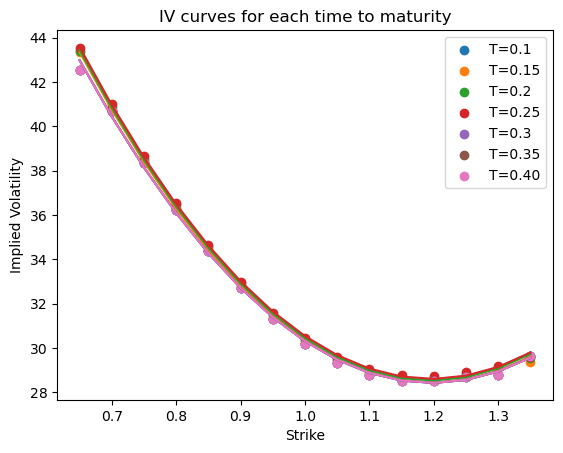

In [36]:
plt.scatter(X_vol_01_arr, Y_vol_01_arr, label='T=0.1')
fi01 = np.polyfit (X_vol_01_arr, Y_vol_01_arr, 2 )
trend01 = np.poly1d(fi01)
plt.plot (X_vol_01_arr, trend01(X_vol_01_arr)) 

plt.scatter(X_vol_015_arr, Y_vol_015_arr, label='T=0.15')
fi015 = np.polyfit (X_vol_015_arr, Y_vol_015_arr, 2 )
trend015 = np.poly1d(fi015)
plt.plot (X_vol_015_arr, trend015(X_vol_015_arr))

plt.scatter(X_vol_020_arr, Y_vol_020_arr, label='T=0.2')
fi020 = np.polyfit (X_vol_020_arr, Y_vol_020_arr, 2 )
trend020 = np.poly1d(fi020)
plt.plot (X_vol_020_arr, trend020(X_vol_020_arr))


plt.scatter(X_vol_025_arr, Y_vol_025_arr, label='T=0.25')
fi025 = np.polyfit (X_vol_025_arr, Y_vol_025_arr, 2 )
trend025 = np.poly1d(fi025)
plt.plot (X_vol_025_arr, trend025(X_vol_025_arr))

plt.scatter(X_vol_030_arr, Y_vol_030_arr, label='T=0.3')
fi030 = np.polyfit (X_vol_030_arr, Y_vol_030_arr, 2 )
trend030 = np.poly1d(fi030)
plt.plot (X_vol_030_arr, trend030(X_vol_030_arr))

plt.scatter(X_vol_035_arr, Y_vol_035_arr, label='T=0.35')
fi035 = np.polyfit (X_vol_035_arr, Y_vol_035_arr, 2 )
trend035 = np.poly1d(fi035)
plt.plot (X_vol_035_arr, trend035(X_vol_035_arr))

plt.scatter(X_vol_040_arr, Y_vol_040_arr, label='T=0.40')
fi040 = np.polyfit (X_vol_040_arr, Y_vol_040_arr, 2 )
trend040 = np.poly1d(fi040)
plt.plot (X_vol_040_arr, trend040(X_vol_040_arr))


plt.title('IV curves for each time to maturity')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.legend()

plt.show()

Наблюдается схожая форма кривых волатильности для разных периодов до экспирации

Форма напоминает известную "улыбку волатильности"

Теперь изобразим всю поверхность подразумеваемой волатильности:

Посчитаем Moneyness по формуле Moneyness = Strike / s0 (один из вариантов подсчёта)

In [37]:
Moneyness = []
for n1 in range(len(strike)):
    moneyn = strike[n1] / 1  # 1 = цена спот(по условию)
    Moneyness.append(moneyn)
Moneyness_arr = np.array(Moneyness)
expir_arr = np.array(expir)
IV_arr = np.array(IV_opts)
    

In [38]:
from mpl_toolkits.mplot3d import Axes3D

In [39]:
#fig7 = plt.figure(figsize=(7,4))
#ax_3d = Axes3D(fig7)
#ax_3d.set_xlabel('Time to expiration(in fractions of a year)')
#ax_3d.set_ylabel('Moneyness')
#ax_3d.set_ylabel('Implied volatility')
#xgrid = expir_arr
#ygrid = Moneyness_arr
#X9, Y9 = np.meshgrid(xgrid, ygrid)
#zgrid = IV_arr
#ax_3d.plot_surface(xgrid, ygrid, zgrid)

для начала построим графики зависимости IV от Moneyness и time to expiration:

In [40]:
print(Moneyness_arr)

[0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3
 1.35 0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25
 1.3  1.35 0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2
 1.25 1.3  1.35 0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15
 1.2  1.25 1.3  1.35 0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1
 1.15 1.2  1.25 1.3  1.35 0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05
 1.1  1.15 1.2  1.25 1.3  1.35 0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.
 1.05 1.1  1.15 1.2  1.25 1.3  1.35]


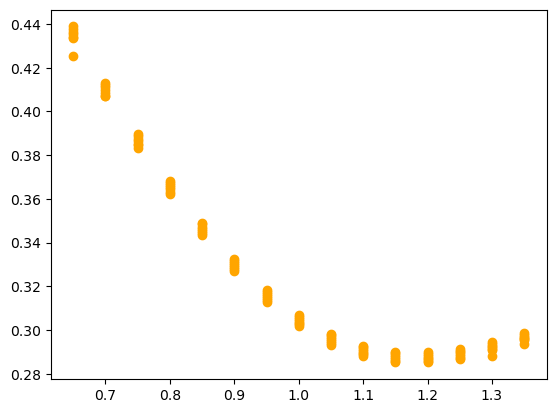

In [41]:
plt.scatter(Moneyness_arr, IV_arr, color='orange')

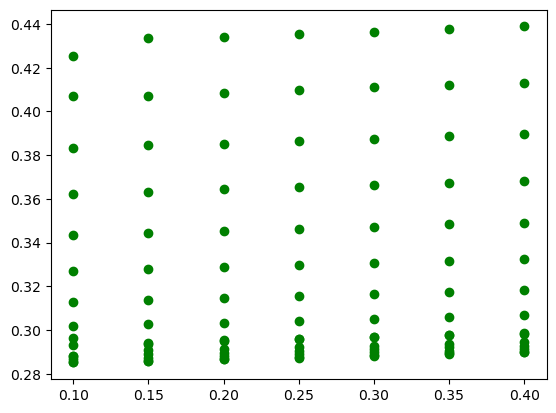

In [42]:
plt.scatter(expir_arr, IV_arr, color='green')

In [43]:
#from pandas_datareader.data import Options
#from dateutil.parser import parse
from datetime import datetime
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
#from implied_vol import BlackScholes
from functools import partial
from scipy import optimize
import numpy as np
from scipy.interpolate import griddata

In [44]:
#def make_surf(expir_arr,Moneyness_arr,IV_arr):
 #  XX,YY = meshgrid(linspace(min(expir_arr),max(expir_arr),230),linspace(min(Moneyness_arr),max(Moneyness_arr),230))
  # ZZ = griddata(array([expir_arr,Moneyness_arr]).T,array(IV_arr),(XX,YY), method='linear')
   #return XX,YY,ZZ

In [45]:
   
#def mesh_plot2(X,Y,Z,fig,ax):
 
 #  XX,YY,ZZ = make_surf(expir_arr,Moneyness_arr,IV_arr)
  # ax.plot_surface(XX,YY,ZZ, color = 'white')
   #ax.contour(XX,YY,ZZ)
   #plt.xlabel("expiry")
   #plt.ylabel("strike")
 
#def combine_plots(expir_arr,Moneyness_arr,IV_arr):
 #  fig = plt.figure()
  # ax = Axes3D(fig, azim = -29, elev = 50)
  # mesh_plot2(expir_arr,Moneyness_arr,IV_arr,fig,ax)
  # ax.plot3D(expir_arr,Moneyness_arr,IV_arr,fig,ax)
  # plt.show()

In [46]:
#combine_plots(expir_arr,Moneyness_arr,IV_arr)

Я не понял как построить поверхность волатильности по данным, поэтому построю поверхность исходя из своей линейной решрессионной модели из пункта б 

In [84]:
from mpl_toolkits.mplot3d import Axes3D
#import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt


In [97]:
#f_vol = lambda x, y: (-0.19344243 * x**3) + (y**3 * 0.01020533) + 0.52026324
#f_vol = IV_opts
# создаём полотно для рисунка
#fig = plt.figure(figsize = (10, 10))
# создаём рисунок пространства с поверхностью
#ax = fig.add_subplot(1, 1, 1, projection = '3d')
# размечаем границы осей для аргументов
#xval = Moneyness_arr
#yval = expir_arr
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
#x, y = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
#z = f_vol(x, y)
# создаём поверхность
#surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
#x, y, z, 
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
#rstride = 10,
#cstride = 10,
# цветовая схема plasma
#cmap = cm.viridis)
#ax.set_xlabel('Moneyness')
#ax.set_ylabel('Strike')
#ax.set_zlabel('Implied volatility')
#ax.set_title('Volatility surface')

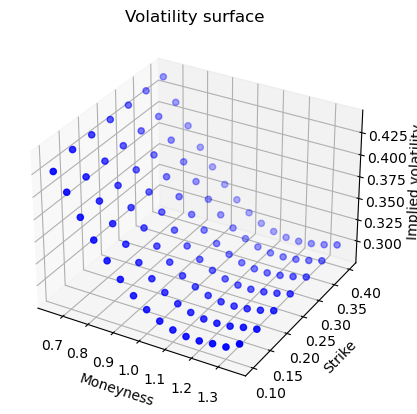

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Generate the values
x_vals = Moneyness_arr
y_vals = expir_arr
z_vals = IV_arr
# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')
ax.set_xlabel('Moneyness')
ax.set_ylabel('Strike')
ax.set_zlabel('Implied volatility')
ax.set_title('Volatility surface')
cmap='greens'
plt.show()

# №2

In [47]:
import pandas as pd 
 
# assign data of lists. 
data = {'STRIKE':[s88 for s88 in strike], 'Time to expiration':[s89 for s89 in expir], 'IV':[iv_df for iv_df in IV_opts]} 
 
# Creates pandas DataFrame. 
df = pd.DataFrame(data) 
 
# print the data 
print(df) 


     STRIKE  Time to expiration        IV
0      0.65                 0.1  0.425597
1      0.70                 0.1  0.406972
2      0.75                 0.1  0.383481
3      0.80                 0.1  0.362384
4      0.85                 0.1  0.343563
..      ...                 ...       ...
100    1.15                 0.4  0.290118
101    1.20                 0.4  0.289792
102    1.25                 0.4  0.291442
103    1.30                 0.4  0.294529
104    1.35                 0.4  0.298658

[105 rows x 3 columns]


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
Y = df['IV'] #целевая переменная

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
X = df[['STRIKE', 'Time to expiration']] #предикты

In [52]:
(X_train, X_test, y_train, y_test) = train_test_split(X, Y, test_size = 0.2)

In [53]:
X_train

,STRIKE,Time to expiration
77,0.75,0.35
20,0.90,0.15
89,1.35,0.35
43,1.30,0.20
34,0.85,0.20
...,...,...
1,0.70,0.10
57,1.25,0.25
79,0.85,0.35
11,1.20,0.10


In [54]:
y_train

77    0.388618
20    0.327857
89    0.297769
43    0.291197
34    0.345370
        ...   
1     0.406972
57    0.289014
79    0.348288
11    0.285146
87    0.290626
Name: IV, Length: 84, dtype: float64

In [55]:
#размер train-ов одинаковый, все ок. Теперь приступаем к обучению: 

In [56]:
y_train = np.array(y_train).reshape(-1, 1)


lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [57]:
lin_model.coef_ #коэфициенты перед независимой переменной

array([[-0.19344243,  0.01020533]])

In [58]:
lin_model.intercept_ #свободный коэффициент

array([0.52026324])

In [59]:
#Считаем MSE (по тестовой выборке):

In [60]:
from sklearn.metrics import mean_squared_error

#x_test = np.array(X_test['age']).reshape(-1, 1)
#y_test = np.array(y_test).reshape(-1, 1)

y_test_pred = lin_model.predict(X_test) #ищем предсказанные значения
mean_squared_error(y_test, y_test_pred)

0.00036753523374931005

In [61]:
#Считаем коэффициент детерминации (по тестовой выборке):

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8317640824577188

In [63]:
#коэф детерминации >0.75, это хорошо

Показатели модели хорошие, можем использовать её. Получается, что:

IV = -0.18934844 * STRIKE + 0.02457205 * T + 0.51140245

In [64]:
from sympy import diff, symbols
w0, y0 = symbols('w0 y0')

In [65]:
def implied_voly(STRIKE0, T0):
    re

In [93]:
def local_volatility(T0, STRIKE0):
    implied_voly = -0.18934844 * STRIKE0 + 0.02457205 * T0 + 0.51140245
    sigm2 = implied_voly ** 2
    w0 = sigm2 * T0
    y0 = STRIKE0                                               #то есть, страйк/1, 1 = цена спот
    nomin0 = w0.diff(T0)
    first_wy = w0.diff(y0)
    denomin0 = 1 - (y/w)*(w0.diff(y0)) + 0.25*(-0.25 - (1/w) + (y0**2)/(w0**2))*((w0.diff(y0))**2) + 0.5*first_wy.diff(y0)
    vol_dup = math.sqrt(nomin0/denomin0)
    res = subs(x, 10).evalf()
    return vol_dup

In [106]:
print(local_volatility(10, 5)) #я не смог правильно сконструировать формулу, но может, хотя бы часть с линейной регресией будет полезна

AttributeError: 'float' object has no attribute 'diff'

# №3

Ревлизуем оценку стоимости опционов методом Монте-Карло:

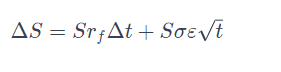

In [68]:
# rf = r = 0

In [69]:
# для реализации этого калькулятора я использовал свои знания ООП, а также статьи в интернете, где люди разрабатывали подобные калькуляторы

In [70]:

class MC_calculator():
    def __init__(self, exp_mc, strike_mc, s0, vol_mc, r, paths):
        self.var_mc = vol_mc**2 * exp_mc
        self.root_Var = math.sqrt(self.var_mc)
        self.itoCorr = -0.5*self.var_mc
        self.movedSpot = s0*math.exp(r*exp_mc + self.itoCorr)
        self.runningSum = 0
        for i in range(0,paths):
            norm_pars = np.random.normal()
            thisSpot = self.movedSpot*math.exp(self.root_Var*norm_pars)
            thisPayoff = thisSpot - strike_mc
            thisPayoff = thisPayoff if thisPayoff > 0 else 0
            self.runningSum+=thisPayoff
        
        self.mean = self.runningSum/paths
        self.mean*= math.exp(-r * exp_mc)
    
    def getMean(self):
        return round(self.mean,2)

In [71]:
#model = MC_calculator(2,32,30,.1,0.03,1000000)
#model.getMean()

In [72]:
#к сожалению, я не придума, как методом Монте-Карло рассчитать волатильность. 
#Поэтому использую модель линейной регрессии из пункта 2.

IV = -0.18934844 * STRIKE + 0.02457205 * T + 0.51140245

In [73]:
STRIKE_3 = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
  

In [74]:
IV_3 = []
for strike_3 in STRIKE_3:
    iv_3 = -0.18934844 * (strike_3) + 0.02457205 * 0.25 + 0.51140245
    IV_3.append(iv_3)
IV_3_perc = np.array([bb*100 for bb in IV_3])    
print(IV_3_perc)   


[40.39363985 38.50015545 36.60667105 34.71318665 32.81970225 30.92621785
 29.03273345 27.13924905 25.24576465]


In [75]:
#теперь вычислим цену для каждого опциона по модели Монте-Карло:

In [76]:
all_opts_3 = [] #создадим список всех опционов из задания 3
for ivmc in range(len(IV_3)):
    opt_mc = []
    opt_mc.append(IV_3[ivmc])
    opt_mc.append(STRIKE_3[ivmc])
    opt_mc.append(0.25)
    all_opts_3.append(opt_mc)
    
print(all_opts_3)    


[[0.40393639849999996, 0.6, 0.25], [0.38500155449999995, 0.7, 0.25], [0.36606671049999995, 0.8, 0.25], [0.34713186649999994, 0.9, 0.25], [0.32819702249999994, 1.0, 0.25], [0.30926217849999993, 1.1, 0.25], [0.2903273344999999, 1.2, 0.25], [0.2713924904999999, 1.3, 0.25], [0.25245764649999997, 1.4, 0.25]]


In [77]:
#вычисляем:

In [78]:
prices_mc = []
for opt_mc1 in all_opts_3:
    mc_price_result = MC_calculator(opt_mc1[2], opt_mc1[1], 1, opt_mc1[0], 0, 1000000)
    result_mc = mc_price_result.getMean()
    prices_mc.append(result_mc)
prices_mc = np.array(prices_mc)    

In [79]:
print(prices_mc)

[0.4  0.3  0.21 0.13 0.07 0.03 0.01 0.   0.  ]


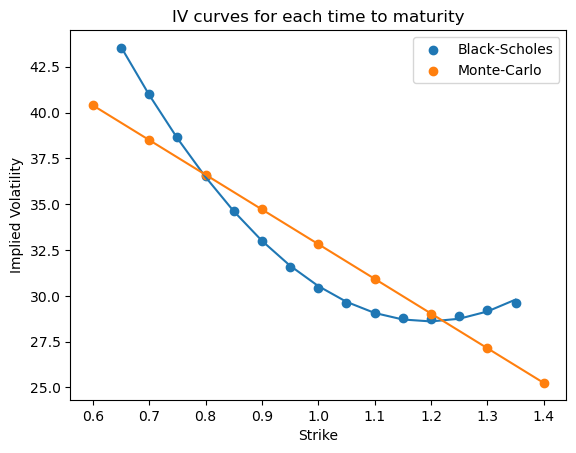

In [80]:
#наносим на график волатильности из пункта 1 с Т=0.25
plt.scatter(X_vol_025_arr, Y_vol_025_arr, label='Black-Scholes')
fi025 = np.polyfit (X_vol_025_arr, Y_vol_025_arr, 2 )
trend025 = np.poly1d(fi025)
plt.plot (X_vol_025_arr, trend025(X_vol_025_arr))

plt.title('IV curves for each time to maturity')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.legend()


#наносим на график волатильности по методу Монте-Карло:
plt.scatter(STRIKE_3, IV_3_perc, label='Monte-Carlo')
fi_mc = np.polyfit (STRIKE_3, IV_3_perc, 2 )
trend025 = np.poly1d(fi_mc)
plt.plot (STRIKE_3, trend025(STRIKE_3))

plt.title('IV curves for each time to maturity')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.legend()

plt.show()

In [83]:
# к сожалению я не понял как найти волатильность в этом пункте, поэтому применил линейную регрессию, но она не очень хорошо предсказывает

In [81]:
#теперь сравним цены из пункта 1 и цены, посчитанные Монте-Карло

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


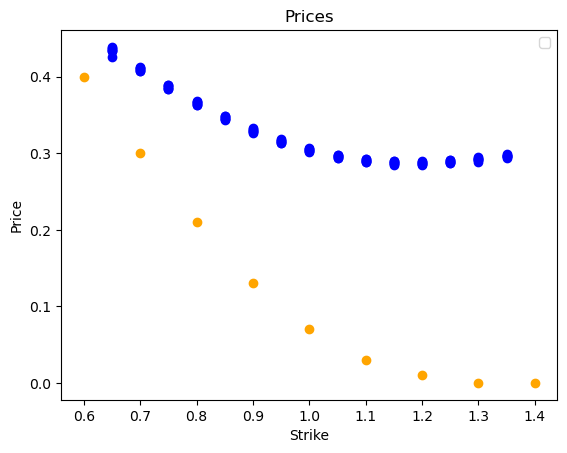

In [82]:
plt.scatter(Moneyness_arr, IV_arr, color='blue')
plt.scatter(STRIKE_3, prices_mc, color='orange')

plt.title('Prices')
plt.xlabel('Strike')
plt.ylabel('Price')
plt.legend()